In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [226]:
data1 = pd.read_excel('dataset/2021년_06월_교통카드_통계자료.xls', thousands = ',')
data1

,사용월,노선ID,노선번호,노선명,버스정류장ID,버스정류장명,승차승객수,하차승객수,작업일시
0,2021-06,11110897,0017,0017번(청암동~이촌동),1,청암자이아파트,473,11,2021-07-03 11:17:40
1,2021-06,11110897,0017,0017번(청암동~이촌동),2,청암동강변삼성아파트,1713,34,2021-07-03 11:17:40
2,2021-06,11110897,0017,0017번(청암동~이촌동),3,청심경로당,2499,31,2021-07-03 11:17:40
3,2021-06,11110897,0017,0017번(청암동~이촌동),4,원효2동주민센터,4448,128,2021-07-03 11:17:40
4,2021-06,11110897,0017,0017번(청암동~이촌동),5,산천동,6267,278,2021-07-03 11:17:40
...,...,...,...,...,...,...,...,...,...
38931,2021-06,11110729,중랑02,중랑02(진로아파트~한신아파트),22,서일대정문,122,3554,2021-07-03 11:17:40
38932,2021-06,11110729,중랑02,중랑02(진로아파트~한신아파트),23,새마을금고,487,5282,2021-07-03 11:17:40
38933,2021-06,11110729,중랑02,중랑02(진로아파트~한신아파트),24,공판장,30,6604,2021-07-03 11:17:40
38934,2021-06,11110729,중랑02,중랑02(진로아파트~한신아파트),25,진주빌라.바다약국,25,9188,2021-07-03 11:17:40


In [13]:
data2 = pd.read_csv('dataset/CARD_SUBWAY_MONTH_202106.csv')
data2

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210601,3호선,신사,28955,30583,20210604,NaN
20210601,3호선,잠원,4780,4656,20210604,NaN
20210601,3호선,고속터미널,33986,32532,20210604,NaN
20210601,3호선,교대(법원.검찰청),14136,9362,20210604,NaN
20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,NaN
...,...,...,...,...,...,...
20210630,1호선,서울역,42545,39641,20210703,NaN
20210630,8호선,신흥,4343,4713,20210703,NaN
20210630,분당선,망포,14451,13503,20210703,NaN
20210630,분당선,매탄권선,5121,4907,20210703,NaN


유무임 통계자료


In [179]:
data3 = pd.read_excel('dataset/2021년_06월_교통카드_유무임통계자료.xlsx')
data3

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
1,2021-06,1호선,10,동묘앞,122567,130984,140198,141067,2021-07-03 11:17:45
2,2021-06,1호선,2,시청,471693,484053,62086,61689,2021-07-03 11:17:45
3,2021-06,1호선,3,종각,771110,752458,111805,105694,2021-07-03 11:17:45
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
...,...,...,...,...,...,...,...,...,...
603,2021-06,우이신설선,710,북한산보국문,123564,115379,37368,37811,2021-07-03 11:17:45
604,2021-06,우이신설선,711,정릉,83296,75129,39625,37173,2021-07-03 11:17:45
605,2021-06,우이신설선,712,성신여대입구(돈암),60791,71260,25633,24546,2021-07-03 11:17:45
606,2021-06,우이신설선,713,보문,27516,27210,12863,13179,2021-07-03 11:17:45


In [180]:
df3 = pd.DataFrame(data3)

사용할 열만 택해서 다시 만듬

In [181]:
df3[['호선명', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,981045,929270,167818,158386
1,1호선,동묘앞,122567,130984,140198,141067
2,1호선,시청,471693,484053,62086,61689
3,1호선,종각,771110,752458,111805,105694
4,1호선,종로3가,427162,383856,257671,241239
...,...,...,...,...,...,...
603,우이신설선,북한산보국문,123564,115379,37368,37811
604,우이신설선,정릉,83296,75129,39625,37173
605,우이신설선,성신여대입구(돈암),60791,71260,25633,24546
606,우이신설선,보문,27516,27210,12863,13179


각 라인의 평균값을 알아보자

In [187]:
linedf = df3['무임승차'].groupby(df3['호선명'])
linedf_mean = linedf.mean()
linedf_mean = linedf_mean.astype(int)
linedf_mean_up = linedf_mean.sort_values(ascending=False)
linedf_mean_up.head(9)


호선명
1호선    166383
4호선     86145
2호선     82715
경인선     74815
3호선     66378
일산선     56249
7호선     54040
8호선     51139
5호선     49844
Name: 무임승차, dtype: int32

# 1호선

In [149]:

dff1 = df3.loc[data3['호선명'] == '1호선']
dff11 = dff1.sort_values(by='무임승차', ascending=False)
dff11 

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리(서울시립대입구),317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
1,2021-06,1호선,10,동묘앞,122567,130984,140198,141067,2021-07-03 11:17:45
3,2021-06,1호선,3,종각,771110,752458,111805,105694,2021-07-03 11:17:45
6,2021-06,1호선,6,동대문,209710,199031,110748,110030,2021-07-03 11:17:45
7,2021-06,1호선,7,신설동,265865,260735,103350,99401,2021-07-03 11:17:45
2,2021-06,1호선,2,시청,471693,484053,62086,61689,2021-07-03 11:17:45


In [162]:
dfmean1 = dff1['무임승차'].mean()
dfmean11 = dff11[(dff11['무임승차'] > dfmean1)]
dfmean11


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리(서울시립대입구),317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45


<Figure size 2880x2160 with 0 Axes>

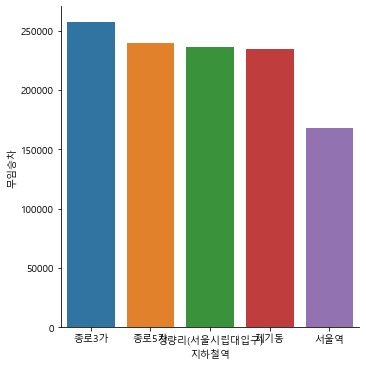

In [203]:
plt.figure(figsize=(40,30))
plt.rcParams['lines.linewidth'] = 4
pp1 = sns.catplot(x='지하철역', y='무임승차', data=dfmean11, kind='bar');
pp1

# 2호선


In [188]:
dff2 = df3.loc[data3['호선명'] == '2호선']
dff22 = dff2.sort_values(by='무임승차', ascending=False)
dff22

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45
37,2021-06,2호선,38,서울대입구(관악구청),1120782,1106023,158924,152541,2021-07-03 11:17:45
25,2021-06,2호선,26,잠실(송파구청),1661499,1650343,155822,149203,2021-07-03 11:17:45
31,2021-06,2호선,32,강남,2058680,2036873,151157,134365,2021-07-03 11:17:45
35,2021-06,2호선,36,사당,823626,919950,148403,143243,2021-07-03 11:17:45
41,2021-06,2호선,42,구로디지털단지,1441352,1436292,146039,148479,2021-07-03 11:17:45
30,2021-06,2호선,31,역삼,1120925,1259883,131839,133212,2021-07-03 11:17:45
32,2021-06,2호선,33,교대(법원.검찰청),735714,830654,126797,141422,2021-07-03 11:17:45


In [198]:
dfmean2 = dff2['무임승차'].mean()
dfmean22 = dff22[(dff22['무임승차'] > dfmean2)]
dfmean22 = dfmean22[(dfmean22['무임승차'] > 100000)]
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['서울대입구(관악구청)'],'서울대입구')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['잠실(송파구청)'],'잠실')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['구로디지털단지'],'구로디지털')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['교대(법원.검찰청)'],'교대')
dfmean22['지하철역'] = dfmean22['지하철역'].replace(['대림(구로구청)'],'교대')
dfmean22

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45
37,2021-06,2호선,38,서울대입구,1120782,1106023,158924,152541,2021-07-03 11:17:45
25,2021-06,2호선,26,잠실,1661499,1650343,155822,149203,2021-07-03 11:17:45
31,2021-06,2호선,32,강남,2058680,2036873,151157,134365,2021-07-03 11:17:45
35,2021-06,2호선,36,사당,823626,919950,148403,143243,2021-07-03 11:17:45
41,2021-06,2호선,42,구로디지털,1441352,1436292,146039,148479,2021-07-03 11:17:45
30,2021-06,2호선,31,역삼,1120925,1259883,131839,133212,2021-07-03 11:17:45
32,2021-06,2호선,33,교대,735714,830654,126797,141422,2021-07-03 11:17:45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '신림'),
  Text(1, 0, '선릉'),
  Text(2, 0, '신도림'),
  Text(3, 0, '서울대입구'),
  Text(4, 0, '잠실'),
  Text(5, 0, '강남'),
  Text(6, 0, '사당'),
  Text(7, 0, '구로디지털'),
  Text(8, 0, '역삼'),
  Text(9, 0, '교대'),
  Text(10, 0, '봉천'),
  Text(11, 0, '신대방'),
  Text(12, 0, '신촌')])

<Figure size 1080x864 with 0 Axes>

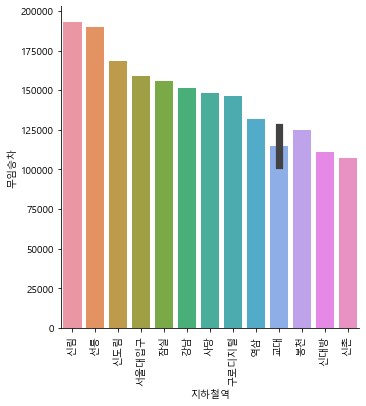

In [202]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp2 = sns.catplot(x='지하철역', y='무임승차', data=dfmean22, kind='bar');
pp2
plt.xticks(rotation=90)

# 1,2호선 합친 테이블

In [232]:
pp10 = pd.concat([dfmean11, dfmean22, dfmean33, dfmean44], axis=0)
pp10

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리(서울시립대입구),317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45
37,2021-06,2호선,38,서울대입구,1120782,1106023,158924,152541,2021-07-03 11:17:45
25,2021-06,2호선,26,잠실,1661499,1650343,155822,149203,2021-07-03 11:17:45


In [233]:
pp10 = pp10.sort_values(by='무임승차', ascending=False)
pp10

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리(서울시립대입구),317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
62,2021-06,3호선,63,연신내,786054,732219,228275,221571,2021-07-03 11:17:45
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
94,2021-06,4호선,100,수유(강북구청),748551,737501,166529,165763,2021-07-03 11:17:45


In [219]:
pp101 = pp10['무임승차'].mean()
pp201 = pp10[(pp10['무임승차'] > pp101)]
pp201

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
4,2021-06,1호선,4,종로3가,427162,383856,257671,241239,2021-07-03 11:17:45
5,2021-06,1호선,5,종로5가,358583,366760,239486,230509,2021-07-03 11:17:45
9,2021-06,1호선,9,청량리(서울시립대입구),317436,314995,236089,240160,2021-07-03 11:17:45
8,2021-06,1호선,8,제기동,224878,218527,234585,252064,2021-07-03 11:17:45
0,2021-06,1호선,1,서울역,981045,929270,167818,158386,2021-07-03 11:17:45
39,2021-06,2호선,40,신림,1505230,1450980,193182,195721,2021-07-03 11:17:45
29,2021-06,2호선,30,선릉,1204673,1074191,189758,169124,2021-07-03 11:17:45
43,2021-06,2호선,44,신도림,1160242,1149293,168261,159929,2021-07-03 11:17:45


# 3호선

In [208]:
dff3 = df3.loc[data3['호선명'] == '3호선']
dff33 = dff3.sort_values(by='무임승차', ascending=False)
dff33

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
62,2021-06,3호선,63,연신내,786054,732219,228275,221571,2021-07-03 11:17:45
80,2021-06,3호선,81,고속터미널,1031018,1005673,146805,139409,2021-07-03 11:17:45
83,2021-06,3호선,84,양재(서초구청),866811,949772,127974,128252,2021-07-03 11:17:45
63,2021-06,3호선,64,불광,324964,349194,122420,134580,2021-07-03 11:17:45
65,2021-06,3호선,66,홍제,344960,320221,119438,117150,2021-07-03 11:17:45
77,2021-06,3호선,78,압구정,732134,783419,111357,108027,2021-07-03 11:17:45
82,2021-06,3호선,83,남부터미널(예술의전당),672409,699318,101395,102744,2021-07-03 11:17:45
61,2021-06,3호선,62,구파발,453460,435833,100575,96242,2021-07-03 11:17:45
90,2021-06,3호선,91,수서,373543,383860,89063,87610,2021-07-03 11:17:45
74,2021-06,3호선,75,약수,276449,270243,71572,67422,2021-07-03 11:17:45


In [210]:
dff33 = dff33.query('지하철역 !="충무로"')
dff33

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
62,2021-06,3호선,63,연신내,786054,732219,228275,221571,2021-07-03 11:17:45
80,2021-06,3호선,81,고속터미널,1031018,1005673,146805,139409,2021-07-03 11:17:45
83,2021-06,3호선,84,양재(서초구청),866811,949772,127974,128252,2021-07-03 11:17:45
63,2021-06,3호선,64,불광,324964,349194,122420,134580,2021-07-03 11:17:45
65,2021-06,3호선,66,홍제,344960,320221,119438,117150,2021-07-03 11:17:45
77,2021-06,3호선,78,압구정,732134,783419,111357,108027,2021-07-03 11:17:45
82,2021-06,3호선,83,남부터미널(예술의전당),672409,699318,101395,102744,2021-07-03 11:17:45
61,2021-06,3호선,62,구파발,453460,435833,100575,96242,2021-07-03 11:17:45
90,2021-06,3호선,91,수서,373543,383860,89063,87610,2021-07-03 11:17:45
74,2021-06,3호선,75,약수,276449,270243,71572,67422,2021-07-03 11:17:45


In [224]:
dfmean3 = dff33['무임승차'].mean()
dfmean33 = dff33[(dff33['무임승차'] > dfmean3)]
dfmean33['지하철역'] = dfmean33['지하철역'].replace(['양재(서초구청)'],'양재')
dfmean33['지하철역'] = dfmean33['지하철역'].replace(['남부터미널(예술의전당)'],'남부터미널')
dfmean33

<ipython-input-224-d09c210db713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmean33['지하철역'] = dfmean33['지하철역'].replace(['양재(서초구청)'],'양재')
<ipython-input-224-d09c210db713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmean33['지하철역'] = dfmean33['지하철역'].replace(['남부터미널(예술의전당)'],'남부터미널')


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
62,2021-06,3호선,63,연신내,786054,732219,228275,221571,2021-07-03 11:17:45
80,2021-06,3호선,81,고속터미널,1031018,1005673,146805,139409,2021-07-03 11:17:45
83,2021-06,3호선,84,양재,866811,949772,127974,128252,2021-07-03 11:17:45
63,2021-06,3호선,64,불광,324964,349194,122420,134580,2021-07-03 11:17:45
65,2021-06,3호선,66,홍제,344960,320221,119438,117150,2021-07-03 11:17:45
77,2021-06,3호선,78,압구정,732134,783419,111357,108027,2021-07-03 11:17:45
82,2021-06,3호선,83,남부터미널,672409,699318,101395,102744,2021-07-03 11:17:45
61,2021-06,3호선,62,구파발,453460,435833,100575,96242,2021-07-03 11:17:45
90,2021-06,3호선,91,수서,373543,383860,89063,87610,2021-07-03 11:17:45
74,2021-06,3호선,75,약수,276449,270243,71572,67422,2021-07-03 11:17:45


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '연신내'),
  Text(1, 0, '고속터미널'),
  Text(2, 0, '양재'),
  Text(3, 0, '불광'),
  Text(4, 0, '홍제'),
  Text(5, 0, '압구정'),
  Text(6, 0, '남부터미널'),
  Text(7, 0, '구파발')])

<Figure size 1080x864 with 0 Axes>

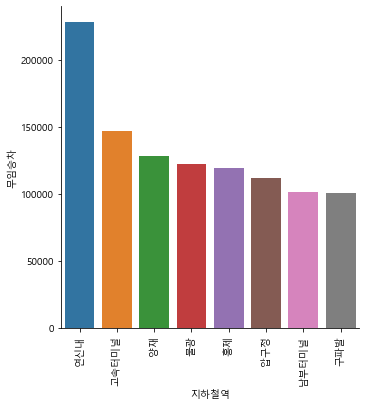

In [217]:
plt.figure(figsize=(15,12))
plt.rcParams['lines.linewidth'] = 4
pp3 = sns.catplot(x='지하철역', y='무임승차', data=dfmean33, kind='bar');
pp3
plt.xticks(rotation=90)

In [ ]:
import csv

f=open('2021년_06월_유무임.csv', 'rt', encoding='UTF8')
data = csv.reader(f)

for row in data:
    print(row)

In [71]:
for row in dff1:
    print(row)

사용월
호선명
역ID
지하철역
유임승차
유임하차
무임승차
무임하차
작업일시


In [68]:
import csv

with open('2021년_06월_유무임.csv', 'rt', encoding='UTF8') as f:
    data = csv.reader(f)
    next(data)
    mx = [0] * 4
    mx_station = [''] * 4
    label = ['유임승차', '유임하차', '무임승차', '무임하차']
    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i].replace(',',''))
            if row[i] > mx[i-4]:
                mx[i-4] = row[i]
                mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i] + ' : ' + mx_station[i], mx[i])


유임승차 : 강남 2호선 2058680
유임하차 : 강남 2호선 2036873
무임승차 : 종로3가 1호선 257671
무임하차 : 제기동 1호선 252064


In [227]:
dff4 = df3.loc[data3['호선명'] == '4호선']
dff4

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
94,2021-06,4호선,100,수유(강북구청),748551,737501,166529,165763,2021-07-03 11:17:45
95,2021-06,4호선,101,미아(서울사이버대학),301057,286266,95606,97628,2021-07-03 11:17:45
96,2021-06,4호선,102,미아사거리,591501,569234,156780,154750,2021-07-03 11:17:45
97,2021-06,4호선,103,길음,437720,418658,95112,95484,2021-07-03 11:17:45
98,2021-06,4호선,104,성신여대입구(돈암),460706,435983,73763,71021,2021-07-03 11:17:45
99,2021-06,4호선,105,한성대입구(삼선교),308289,297663,63092,62440,2021-07-03 11:17:45
100,2021-06,4호선,106,혜화,726771,741583,112612,109975,2021-07-03 11:17:45
101,2021-06,4호선,107,동대문,392647,409566,140754,137113,2021-07-03 11:17:45
102,2021-06,4호선,108,동대문역사문화공원(DDP),342699,316979,48287,43459,2021-07-03 11:17:45
103,2021-06,4호선,109,충무로,555787,578615,100904,101517,2021-07-03 11:17:45


In [231]:
dfmean4 = dff4['무임승차'].mean()
dfmean44 = dff4[(dff4['무임승차'] > dfmean4)]
#dfmean33 = dfmean33[(dfmean33['무임승차'] > 100000)]
#dfmean33['지하철역'] = dfmean33['지하철역'].replace(['양재(서초구청)'],'양재')
#dfmean33['지하철역'] = dfmean33['지하철역'].replace(['남부터미널(예술의전당)'],'남부터미널')
dfmean44 = dfmean44.sort_values(by='무임승차', ascending=False)
dfmean44 = dfmean44.head(5)
dfmean44

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
94,2021-06,4호선,100,수유(강북구청),748551,737501,166529,165763,2021-07-03 11:17:45
118,2021-06,4호선,98,창동,525729,560021,166409,171359,2021-07-03 11:17:45
105,2021-06,4호선,111,회현(남대문시장),460035,497862,163433,163939,2021-07-03 11:17:45
96,2021-06,4호선,102,미아사거리,591501,569234,156780,154750,2021-07-03 11:17:45
101,2021-06,4호선,107,동대문,392647,409566,140754,137113,2021-07-03 11:17:45


In [39]:
dff5 = df3.loc[data3['호선명'] == '5호선']
dff5

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
380,2021-06,5호선,385,방화,"137,908","131,093","44,213","42,586",2021-07-03 11:17:45
381,2021-06,5호선,386,개화산,"112,665","106,826","33,461","32,948",2021-07-03 11:17:45
382,2021-06,5호선,387,김포공항,"185,688","175,427","27,574","29,695",2021-07-03 11:17:45
383,2021-06,5호선,388,송정,"135,342","126,191","45,070","43,314",2021-07-03 11:17:45
384,2021-06,5호선,389,마곡,"228,125","227,883","34,374","33,804",2021-07-03 11:17:45
385,2021-06,5호선,390,발산,"443,506","465,513","77,594","74,755",2021-07-03 11:17:45
386,2021-06,5호선,391,우장산,"305,683","295,801","75,829","79,353",2021-07-03 11:17:45
387,2021-06,5호선,392,화곡,"630,301","586,647","124,428","118,726",2021-07-03 11:17:45
388,2021-06,5호선,393,까치산,"641,920","609,894","134,456","136,654",2021-07-03 11:17:45
389,2021-06,5호선,394,신정(은행정),"316,569","247,829","52,523","51,510",2021-07-03 11:17:45


In [40]:
dff6 = df3.loc[data3['호선명'] == '6호선']
dff6

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
436,2021-06,6호선,441,응암,"374,997","369,904","99,769","98,384",2021-07-03 11:17:45
437,2021-06,6호선,442,역촌,"73,269","90,229","29,108","28,546",2021-07-03 11:17:45
438,2021-06,6호선,443,불광,"88,031","90,969","35,780","29,796",2021-07-03 11:17:45
439,2021-06,6호선,444,독바위,"58,228","59,018","17,802","22,012",2021-07-03 11:17:45
440,2021-06,6호선,445,연신내,19,0,2,0,2021-07-03 11:17:45
441,2021-06,6호선,446,구산,"159,864","107,843","44,232","45,950",2021-07-03 11:17:45
442,2021-06,6호선,447,새절(신사),"270,576","248,655","76,001","76,625",2021-07-03 11:17:45
443,2021-06,6호선,448,증산(명지대앞),"209,102","204,367","61,795","63,240",2021-07-03 11:17:45
444,2021-06,6호선,449,디지털미디어시티,"307,996","336,861","47,213","47,079",2021-07-03 11:17:45
445,2021-06,6호선,450,월드컵경기장(성산),"79,457","87,206","53,090","51,868",2021-07-03 11:17:45


In [41]:
dff7 = df3.loc[data3['호선명'] == '7호선']
dff7

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
475,2021-06,7호선,480,장암,"55,601","23,188","9,323","6,877",2021-07-03 11:17:45
476,2021-06,7호선,481,도봉산,"206,587","241,480","44,655","64,006",2021-07-03 11:17:45
477,2021-06,7호선,482,수락산,"272,220","267,576","86,548","86,889",2021-07-03 11:17:45
478,2021-06,7호선,483,마들,"264,195","245,722","72,068","72,259",2021-07-03 11:17:45
479,2021-06,7호선,484,노원,"422,640","454,153","101,514","102,472",2021-07-03 11:17:45
480,2021-06,7호선,485,중계,"303,021","272,488","80,194","77,292",2021-07-03 11:17:45
481,2021-06,7호선,486,하계,"383,813","359,258","88,770","86,065",2021-07-03 11:17:45
482,2021-06,7호선,487,공릉(서울과학기술대),"262,409","261,063","58,976","59,191",2021-07-03 11:17:45
483,2021-06,7호선,488,태릉입구,"188,703","178,976","38,998","36,238",2021-07-03 11:17:45
484,2021-06,7호선,489,먹골,"217,475","210,570","55,900","56,945",2021-07-03 11:17:45


In [42]:
dff8 = df3.loc[data3['호선명'] == '8호선']
dff8

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
526,2021-06,8호선,531,암사,"410,809","356,369","92,148","90,981",2021-07-03 11:17:45
527,2021-06,8호선,532,천호(풍납토성),"332,938","396,171","68,073","65,337",2021-07-03 11:17:45
528,2021-06,8호선,533,강동구청,"220,268","227,073","54,506","54,769",2021-07-03 11:17:45
529,2021-06,8호선,534,몽촌토성(평화의문),"130,804","136,151","27,224","26,191",2021-07-03 11:17:45
530,2021-06,8호선,535,잠실(송파구청),"316,427","381,697","56,376","54,569",2021-07-03 11:17:45
531,2021-06,8호선,536,석촌,"162,733","193,263","41,602","44,587",2021-07-03 11:17:45
532,2021-06,8호선,537,송파,"157,217","157,432","45,624","45,304",2021-07-03 11:17:45
533,2021-06,8호선,538,가락시장,"149,235","169,737","51,429","53,090",2021-07-03 11:17:45
534,2021-06,8호선,539,문정,"495,677","523,702","48,416","47,918",2021-07-03 11:17:45
535,2021-06,8호선,540,장지,"392,197","374,706","66,151","62,624",2021-07-03 11:17:45
